<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p025_LSTM_bidirectionnal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Objectif
Manipuler les LSTMs bidirectionals afin de construire un classifier de texte

# Récupération des données
 
 * Via la librairie `tfds.laod()`
 * name : "imdb_reviews"
 * Apparemment ca renvoie un tensorflow dataset, enfin deux, un pour le training un pour le test
 * Parcourir les données à l'aide de la méthode `.take()`
 * Modification du dataset :    
   * `buffer_size = 10000`
   * `batch_size = 64`
   * `prefetch_value = tf.data.AUTOTUNE`

# Preprocessing Text
 * text_vectorizer
   * `vocab_size = 1000`
   * `encoder.adapt(train_dataset.map(lambda text, label: text))`
   * Encoder et Decoder du texte pour vérifier

# Model
 * text_vectorizer
 * `tf.keras.layers.Embedding` avec 64 units et mask = 0
 * `tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))`
 * `tf.keras.layers.Dense(64, activation='relu')`
 * `tf.keras.layers.Dense(1)`

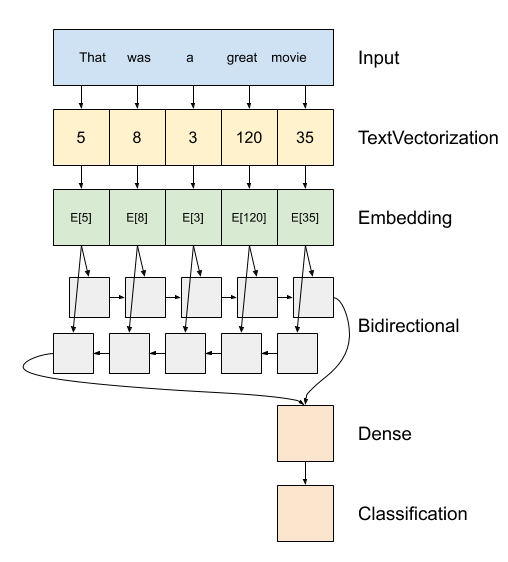

# Verif
 * Quels sont les layers qui possèdent un mask : `print([layer.supports_masking for layer in model.layers])`
 * Test avec un input classique que ca fonctionne

# .Compile() and .Fit()
 * loss = binary cross entropy avec logits = True
 * optimizer = adam à 0.0001
 * metrics = accurac
 * epochs = 10
 * validation_steps = 30

___
# Stacked LSTMs Model
 * text vectorizer
 * Embedding avec 64 units
 * LSTM avec 64 units, probablement un `return_sequences=True` à ne pas oublier
 * LSTM avec 32 units
 * Dense Layer 64 units + relu activation
 * Layer Dropout, 0.5
 * Dense layer 1 unit

# .Compile() and .Fit()

 * loss = binary cross entropy
 * optimizers adam à 0.0001
 * metrics = "accuracy"
 * eopchs = 10
 * validation_steps = 30
 * Essayer de faire une prédiction sur un custom input
